In [1]:
# Importing all the important stuff
from MakeDataset import X_train, X_test, y_train, y_test
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import tsfel
import warnings
warnings.filterwarnings("ignore")

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


## Task 1 : Exploratory Data Analysis (EDA) [3 marks]

### Questions

1. Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data? **[0.5 marks]**

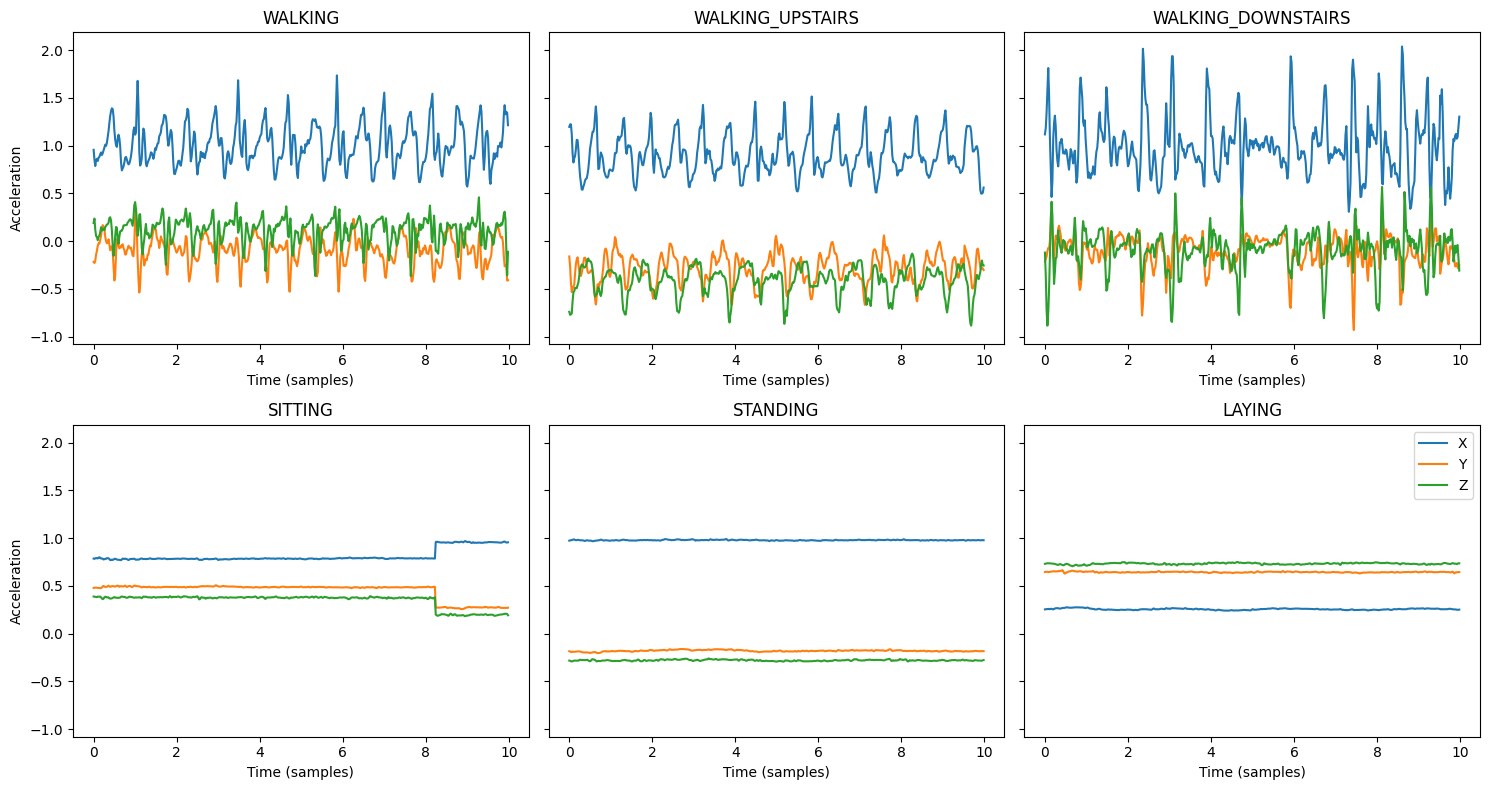

In [2]:
activity_labels = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}

fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharey=True)
axes = axes.ravel()

for i, activity_id in enumerate(activity_labels.keys()):
    idx = np.where(y_train == activity_id)[0][0] # get any of such index
    sample = X_train[idx] # sample of activity where activity == i
    
    time_axis = np.arange(500) / 50.0 # data is on 50 Hz, so time will be 0, 1/50, 2/50, 3/50 ... seconds
    axes[i].plot(time_axis, sample[:, 0], label='X')
    axes[i].plot(time_axis, sample[:, 1], label='Y')
    axes[i].plot(time_axis, sample[:, 2], label='Z')
    axes[i].set_xlabel("Time (seconds)")
    
    axes[i].set_title(activity_labels[activity_id], fontsize=12)
    axes[i].set_xlabel("Time (samples)")
    
    if i % 3 == 0:
        axes[i].set_ylabel("Acceleration")
    if i == 5:
        axes[i].legend()

plt.tight_layout()
plt.show()

2. Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration $(acc_x^2+acc_y^2+acc_z^2)$ for each activity and justify your answer. **[0.5 marks]**

Ans: We would not need a Complex Machine Learning model for this task. We can see that for the **Dynamic** tasks Linear Acc. has fluctuations and high variance too. On the other hand **Static** tasks have const. linear acc. which is Gravity along with some noise. 

For this what we can do is put a threshold on variance of the linear acceleration and predict if it a Dynamic task or Static task

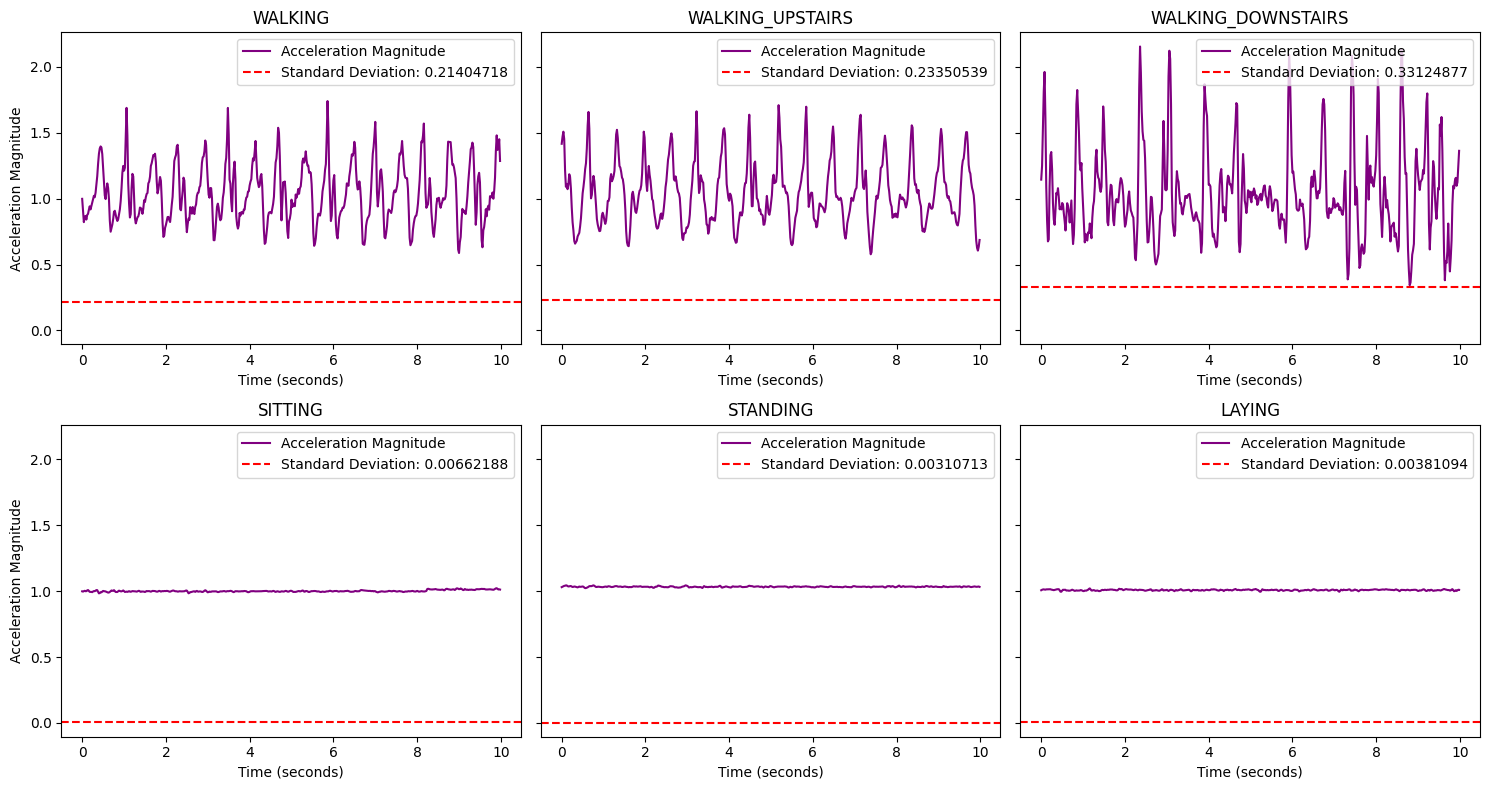

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharey=True)
axes = axes.ravel()

for i, activity_id in enumerate(activity_labels.keys()):
    idx = np.where(y_train == activity_id)[0][0]
    sample = X_train[idx]
    
    # Calculate the acceleration magnitude
    acc_mag = np.sqrt(np.sum(sample**2, axis=1))
    
    # Calculate overall variance of the acceleration magnitude
    overall_variance = np.std(acc_mag)
    
    # Time axis for the plots
    time_axis = np.arange(len(acc_mag)) / 50.0 
    
    # Plot the acceleration magnitude
    axes[i].plot(time_axis, acc_mag, color='purple', label='Acceleration Magnitude')
    
    # Add a horizontal line for the overall variance
    axes[i].axhline(y=overall_variance, color='red', linestyle='--', label=f'Standard Deviation: {overall_variance:.8f}')
    
    axes[i].set_title(activity_labels[activity_id], fontsize=12)
    axes[i].set_xlabel("Time (seconds)")
    
    if i % 3 == 0:
        axes[i].set_ylabel("Acceleration Magnitude")
    
    # Add the legend to each subplot
    axes[i].legend(loc='upper right')

plt.tight_layout()
plt.show()


3. Visualize the data using PCA. **[1 marks]**
* Use PCA (Principal Component Analysis) on Total Acceleration $(acc_x^2+acc_y^2+acc_z^2)$ to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities.

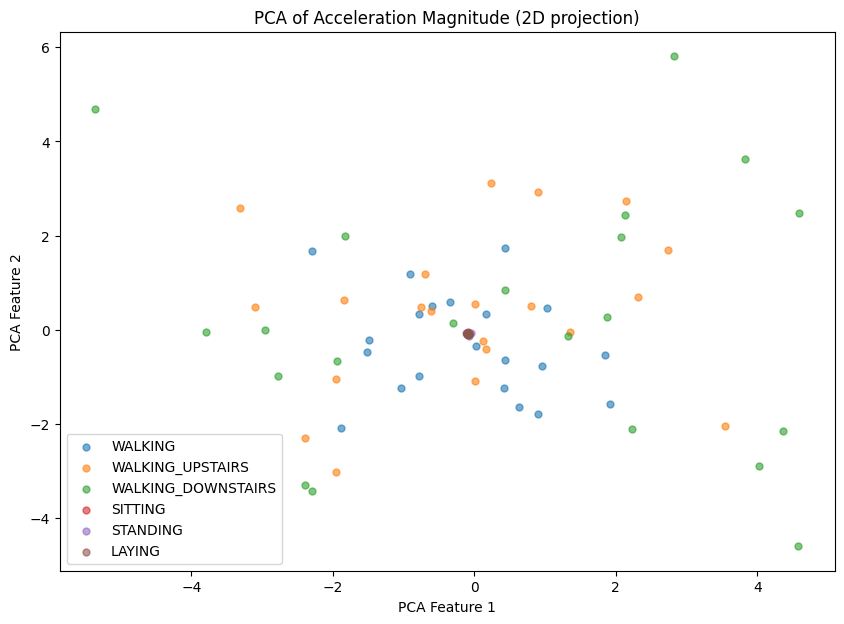

In [4]:
activity_labels = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}

acc_mag = np.sqrt(np.sum(X_train**2, axis=2))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(acc_mag)

plt.figure(figsize=(10, 7))
for activity_id, label in activity_labels.items():
    idx = np.where(y_train == activity_id)
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], s=25, label=label, alpha=0.6)

plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.title("PCA of Acceleration Magnitude (2D projection)")
plt.legend()
plt.show()

* Next, use [TSFEL](https://tsfel.readthedocs.io/en/latest/) ([a featurizer library](https://github.com/fraunhoferportugal/tsfel)) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

In [5]:
cfg = tsfel.get_features_by_domain("all")
feature_dfs = []
for i in range(X_train.shape[0]):
    mag = np.sqrt(np.sum(X_train[i]**2, axis=1))
    feat_df = tsfel.time_series_features_extractor(cfg, mag, verbose=False)
    feature_dfs.append(feat_df)
X_TSFEL_train = pd.concat(feature_dfs, ignore_index=True)

cfg = tsfel.get_features_by_domain("all")
feature_dfs = []
for i in range(X_test.shape[0]):
    mag = np.sqrt(np.sum(X_test[i]**2, axis=1))
    feat_df = tsfel.time_series_features_extractor(cfg, mag, verbose=False)
    feature_dfs.append(feat_df)
X_TSFEL_test = pd.concat(feature_dfs, ignore_index=True)

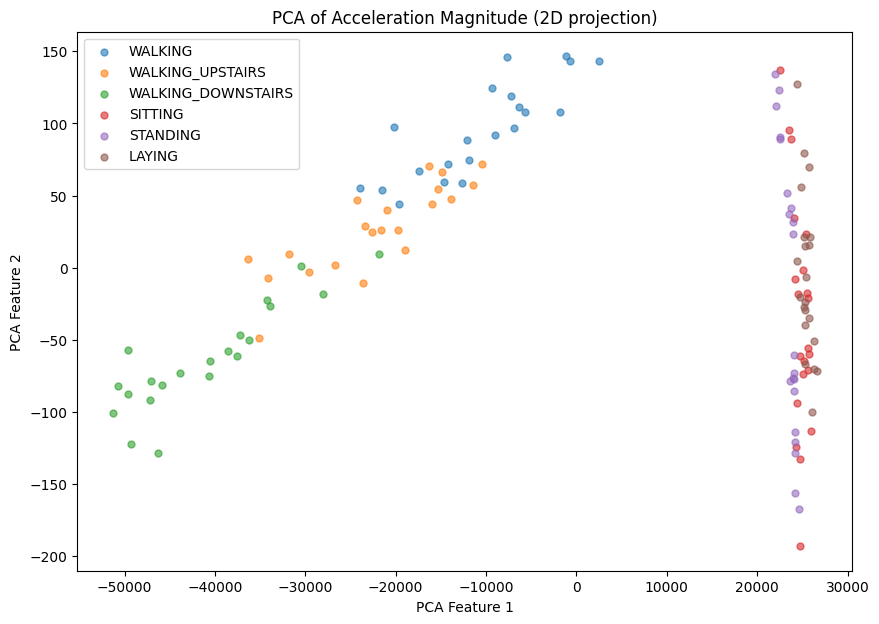

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_TSFEL_train)

plt.figure(figsize=(10, 7))
for activity_id, label in activity_labels.items():
    idx = np.where(y_train == activity_id)
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], s=25, label=label, alpha=0.6)

plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.title("PCA of Acceleration Magnitude (2D projection)")
plt.legend()
plt.show()

* Now use the features provided by the dataset and perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

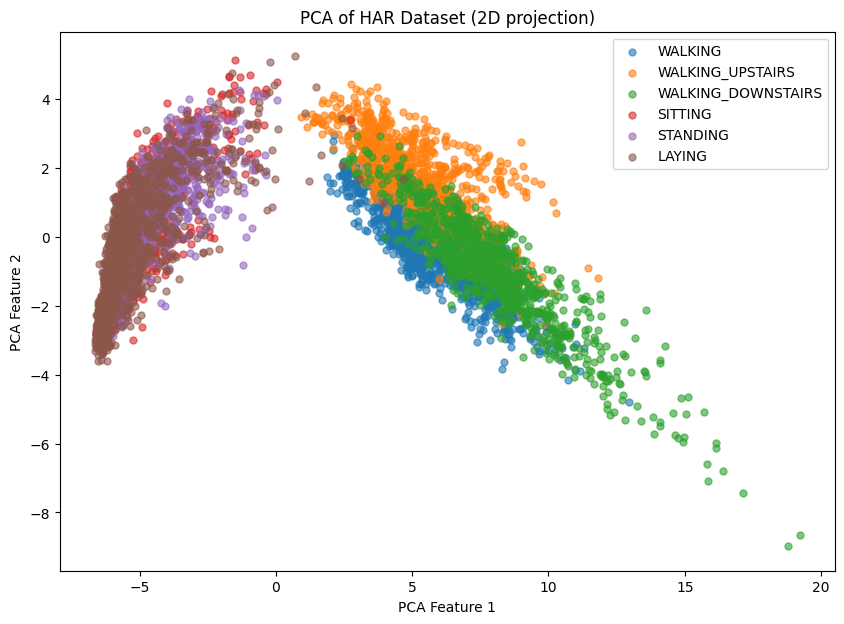

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Feature names
features = pd.read_csv("UCI HAR Dataset/features.txt", sep='\s+', header=None, usecols=[1])[1].tolist()

# Activity labels
activities = pd.read_csv("UCI HAR Dataset/activity_labels.txt", sep='\s+', header=None, index_col=0)[1].to_dict()

# Load train set
X_train_features = pd.read_csv("UCI HAR Dataset/train/X_train.txt", sep='\s+', header=None)
y_train_features = pd.read_csv("UCI HAR Dataset/train/y_train.txt", sep='\s+', header=None)
X_train_features.columns = features
y_train_features = y_train_features.values.ravel()  # flatten to 1D array
# Load test set
X_test_features = pd.read_csv("UCI HAR Dataset/test/X_test.txt", sep='\s+', header=None)
y_test_features = pd.read_csv("UCI HAR Dataset/test/y_test.txt", sep='\s+', header=None)
X_test_features.columns = features
y_test_features = y_test_features.values.ravel()  # flatten to 1D array

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_features)

# Plot
plt.figure(figsize=(10, 7))
for activity_id, label in activities.items():
    idx = np.where(y_train_features == activity_id)
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], s=25, label=label, alpha=0.6)

plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.title("PCA of HAR Dataset (2D projection)")
plt.legend()
plt.show()

* Compare the results of PCA on Total Acceleration, TSFEL and the dataset features. Which method do you think is better for visualizing the data?

The **dataset-provided features (561 features)** are the best for visualizing activity classes. They give clear, distinct clusters for each activity - walking, sitting, standing, laying, etc. because these features are carefully designed from accelerometer and gyroscope data to capture time, frequency, and cross-axis information.  

TSFEL features are good too, but not as clean, and using only the total acceleration magnitude is too simplistic and overlaps too much.


4. Calculate the correlation matrix of the features obtained by TSFEL and provided in the dataset. Identify the features that are highly correlated with each other. Are there any redundant features? [1 marks]


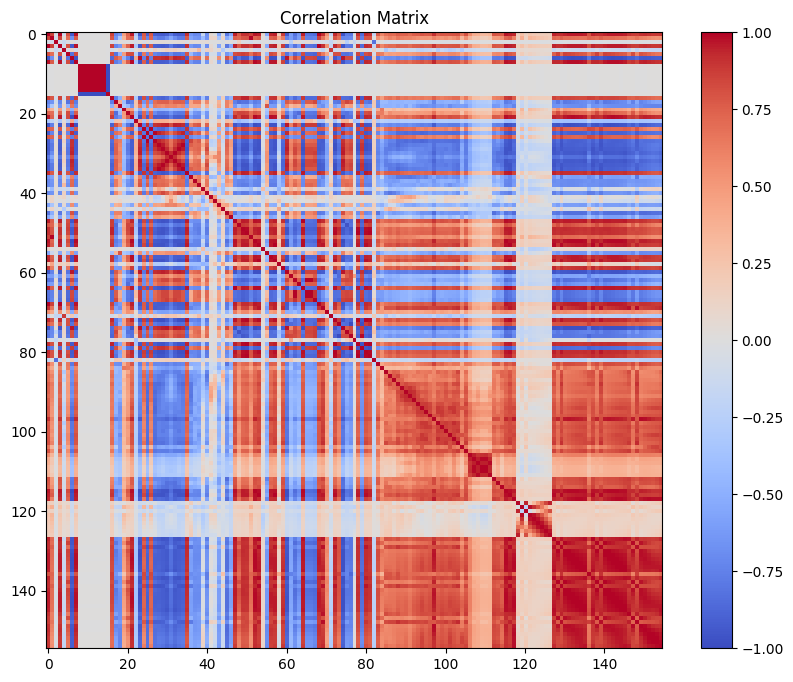

Top 10 correlated Features - 
0_Absolute energy <--> 0_Average power | correlation: 1.0000
0_ECDF_0 <--> 0_ECDF_1 | correlation: 1.0000
0_ECDF_0 <--> 0_ECDF_2 | correlation: 1.0000
0_ECDF_0 <--> 0_ECDF_3 | correlation: 1.0000
0_ECDF_0 <--> 0_ECDF_5 | correlation: 1.0000
0_ECDF_0 <--> 0_ECDF_6 | correlation: 1.0000
0_ECDF_0 <--> 0_ECDF_7 | correlation: 1.0000
0_ECDF_0 <--> 0_ECDF_8 | correlation: -1.0000
0_ECDF_1 <--> 0_ECDF_2 | correlation: 1.0000
0_ECDF_1 <--> 0_ECDF_3 | correlation: 1.0000


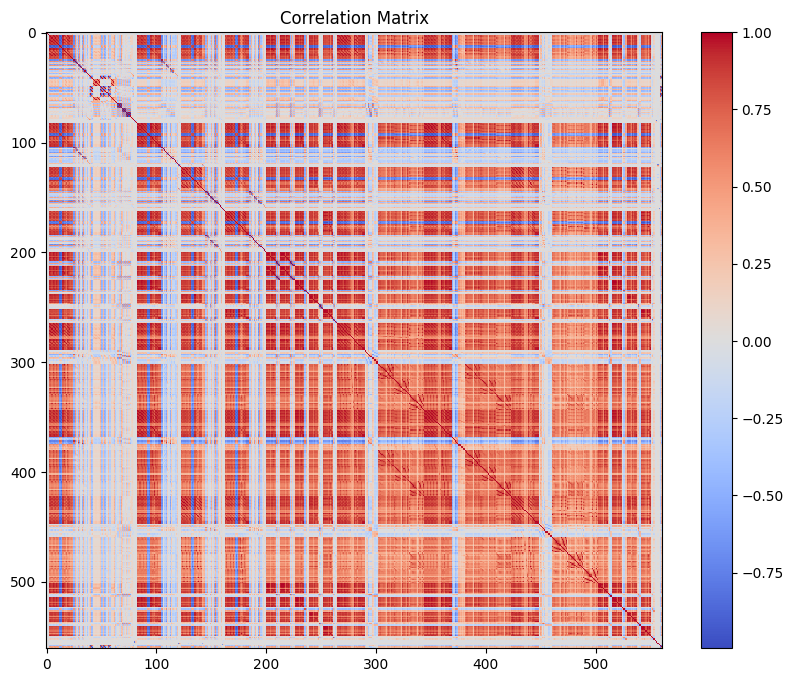

Top 10 correlated Features - 
tBodyAccMag-std() <--> tGravityAccMag-std() | correlation: 1.0000
tBodyAccMag-mad() <--> tGravityAccMag-mad() | correlation: 1.0000
tBodyAccMag-max() <--> tGravityAccMag-max() | correlation: 1.0000
tBodyAccMag-min() <--> tGravityAccMag-min() | correlation: 1.0000
tBodyAccMag-energy() <--> tGravityAccMag-energy() | correlation: 1.0000
tBodyAccMag-iqr() <--> tGravityAccMag-iqr() | correlation: 1.0000
tBodyAccMag-arCoeff()2 <--> tGravityAccMag-arCoeff()2 | correlation: 1.0000
tBodyAccMag-arCoeff()3 <--> tGravityAccMag-arCoeff()3 | correlation: 1.0000
tBodyAccJerkMag-mean() <--> tBodyAccJerkMag-sma() | correlation: 1.0000
tBodyGyroMag-mean() <--> tBodyGyroMag-sma() | correlation: 1.0000


In [8]:
# X_TSFEL_train, X_train_features
def plot_corr_mat(corr_matrix):
    plt.figure(figsize=(10, 8))
    plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
    plt.colorbar()
    plt.title('Correlation Matrix')
    plt.show()

def top_10_correlated_features(X, corr_matrix):
    print("Top 10 correlated Features - ")
    threshold = 0.95
    feature_names = X.columns
    high_corr_pairs = []
    n_features = corr_matrix.shape[0]
    for i in range(n_features):
        for j in range(i + 1, n_features):
            corr_value = corr_matrix[i, j]
            if abs(corr_value) > threshold:
                high_corr_pairs.append((feature_names[i], feature_names[j], corr_value))
    high_corr_pairs = sorted(high_corr_pairs, key=lambda x: -abs(x[2]))
    for f1, f2, corr in high_corr_pairs[:10]:
        print(f"{f1} <--> {f2} | correlation: {corr:.4f}")

# --------------------------------- TSFEL Data ----------------------------------------
stds = np.std(X_TSFEL_train, axis=0)
non_constant_cols = stds > 0
X_TSFEL = X_TSFEL_train.loc[:, non_constant_cols] # remove the columns with 0 std, because data with no variation is almost always useless as it carries no info
corr_matrix = np.corrcoef(X_TSFEL, rowvar=False)
# display(corr_matrix)
plot_corr_mat(corr_matrix)
top_10_correlated_features(X_TSFEL, corr_matrix)

# --------------------------------- HAR Features data --------------------------------- 
corr_matrix = np.corrcoef(X_train_features, rowvar=False)
# print(corr_matrix)
plot_corr_mat(corr_matrix)
top_10_correlated_features(X_train_features, corr_matrix)

There are a lot of features with correlation equal to one, and hence they are highly redundant. After calculating the correlation matrix, it is evident that many features exhibit very high pairwise correlation (close to or exactly 1.0). This indicates a strong linear relationship between those features, meaning they carry overlapping information.

Such redundancy may lead to overfitting and increased computational cost without adding real value to the model.

## Task 2 : Decision Trees for Human Activity Recognition [3 marks]

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_data(X_train, X_test, y_train, y_test, depth=None):
    clf = None
    if depth != None:
        clf = DecisionTreeClassifier(random_state=42, max_depth=depth)
    else:
        clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return clf, y_pred

1. Use Sklearn Library to train Decision Tress. [1.5 marks]
* Train a decision tree model using the raw accelerometer data. Report the accuracy, precision, recall and confusion matrix of the model.

In [10]:
X_train_mag = np.sqrt(np.sum(X_train**2, axis=2))
X_test_mag = np.sqrt(np.sum(X_test**2, axis=2))
model1, y_pred = get_data(X_train_mag, X_test_mag, y_train, y_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6481481481481481
Precision: 0.6476190476190476
Recall: 0.6481481481481481
Confusion Matrix:
[[5 1 2 0 1 0]
 [1 5 1 1 0 1]
 [1 4 4 0 0 0]
 [0 0 0 6 0 3]
 [0 0 0 0 9 0]
 [0 0 0 3 0 6]]


* Train a decision tree model using the features obtained by TSFEL. Report the accuracy, precision, recall and confusion matrix of the model.


In [11]:
model2, y_pred = get_data(X_TSFEL_train, X_TSFEL_test, y_train, y_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7407407407407407
Precision: 0.7544733044733044
Recall: 0.7407407407407406
Confusion Matrix:
[[6 3 0 0 0 0]
 [1 7 0 0 1 0]
 [0 1 8 0 0 0]
 [0 0 0 5 1 3]
 [0 0 0 2 7 0]
 [0 0 0 2 0 7]]


* Train a decision tree model using the features provided in the dataset. Report the accuracy, precision, recall and confusion matrix of the model.

In [12]:
model3, y_pred = get_data(X_train_features, X_test_features, y_train_features, y_test_features)
print(f"Accuracy: {accuracy_score(y_test_features, y_pred)}")
print(f"Precision: {precision_score(y_test_features, y_pred, average='macro')}")
print(f"Recall: {recall_score(y_test_features, y_pred, average='macro')}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_features, y_pred))

Accuracy: 0.8622327790973872
Precision: 0.8624733067496783
Recall: 0.8586831847358827
Confusion Matrix:
[[456  24  16   0   0   0]
 [ 74 369  28   0   0   0]
 [ 19  53 348   0   0   0]
 [  0   0   0 374 117   0]
 [  0   0   0  75 457   0]
 [  0   0   0   0   0 537]]


* Compare the results of the three models. Which model do you think is better?

Model 3 (Created Features) performs the best across all metrics (accuracy, precision, recall).
Model 2 (TSFEL) improves on Model 1 due to more advanced statistical and spectral features, but still lags behind Model 3.
Model 1 (Magnitude Only) performs the worst, showing the limitations of using simple signal magnitude features.

Model 3 is clearly the best model based on its superior accuracy (86.2%), precision, and recall. It uses more advanced features which allowed to distinguish between activities more effectively. 

2. Train Decision Tree with varying depths (2-8) using all above 3 methods. Plot the accuracy of the model on test data vs the depth of the tree. [1 marks]

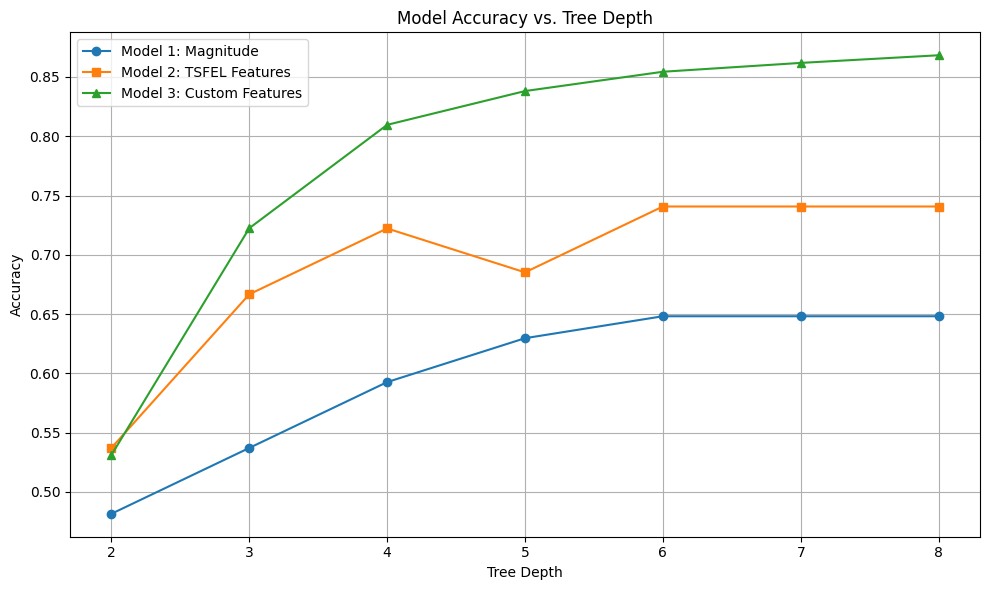

In [13]:
model1_acc, model2_acc, model3_acc = [], [], []
depth_range = range(2, 9)
for depth in depth_range:
    X_train_mag = np.sqrt(np.sum(X_train**2, axis=2))
    X_test_mag = np.sqrt(np.sum(X_test**2, axis=2))
    model_1, y_pred = get_data(X_train_mag, X_test_mag, y_train, y_test, depth)
    model1_acc.append(accuracy_score(y_test, y_pred))

    model_2, y_pred = get_data(X_TSFEL_train, X_TSFEL_test, y_train, y_test, depth)
    model2_acc.append(accuracy_score(y_test, y_pred))
    
    model_3, y_pred = get_data(X_train_features, X_test_features, y_train_features, y_test_features, depth)
    model3_acc.append(accuracy_score(y_test_features, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(depth_range, model1_acc, marker='o', label='Model 1: Magnitude')
plt.plot(depth_range, model2_acc, marker='s', label='Model 2: TSFEL Features')
plt.plot(depth_range, model3_acc, marker='^', label='Model 3: Custom Features')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

3. Are there any participants/ activitivies where the Model performace is bad? If Yes, Why? [0.5 mark]

* The Walking/Walking upstairs and walking downstairs are often confused with each other in almost all the models.
* SITTING is confused with LAYING, STANDING is misclassified as SITTING quite often in all the 3 models.

This is mainly because these activities have
* Similar movement patterns (in dynamic or static states)
* Insufficiently discriminative features

### Task 3 : Data Collection in the Wild [2 marks]

DATA PROCESSING

In [14]:
from scipy.interpolate import interp1d
import os

# Constants
time = 10
offset = 500
freq = 50
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

X_Custom=[]
y_Custom=[]
dataset_dir = os.path.join("Custom Input Data")

def resampleAt50(df):
    df = df.copy()
    df = df.sort_values('time')  # ensure time is sorted
    df = df.set_index('time')
    t_min = df.index.min()
    t_max = df.index.max()
    new_time = np.arange(t_min, t_max, 1/freq)  # 50 Hz => step of 0.02s
    interp_df = pd.DataFrame({'time': new_time})
    for col in df.columns:
        f = interp1d(df.index, df[col], kind='linear', fill_value="extrapolate")
        interp_df[col] = f(new_time)
    # interp_df.set_index('time', inplace=True)
    return interp_df

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = resampleAt50(df)
        df = df.iloc[:, [1, 2, 3]]
        if len(df) < offset+time*freq:
            continue
        df = df[offset:offset+time*freq]
        X_Custom.append(df.values)
        y_Custom.append(classes[folder])
X_Custom = np.array(X_Custom)
y_Custom = np.array(y_Custom)
# print(X_Custom.shape)

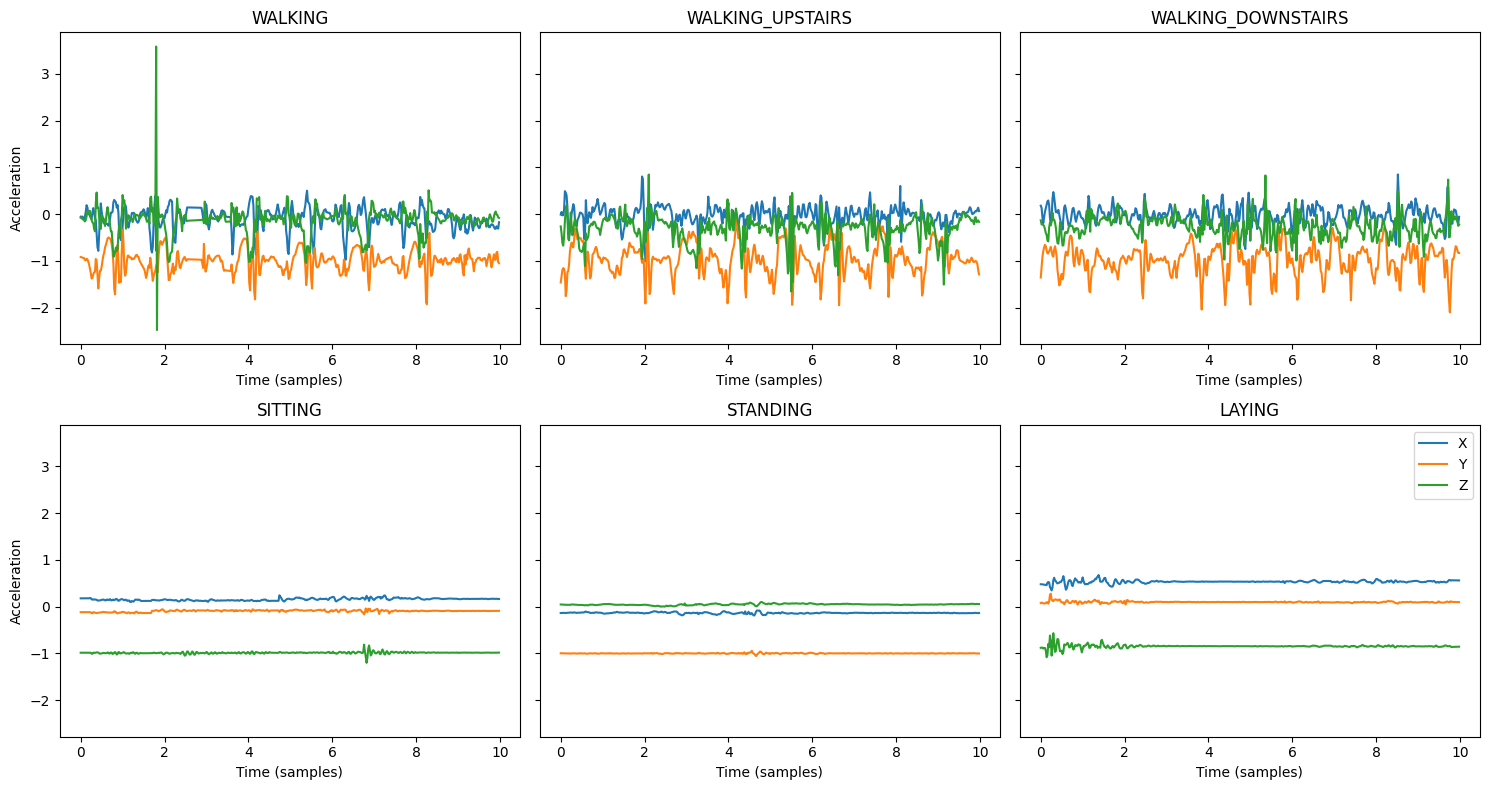

In [15]:
activity_labels = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}

fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharey=True)
axes = axes.ravel()

for i, activity_id in enumerate(activity_labels.keys()):
    idx = np.where(y_Custom == activity_id)[0][0] # get any of such index
    sample = X_Custom[idx] # sample of activity where activity == i
    
    time_axis = np.arange(500) / 50.0 # data is on 50 Hz, so time will be 0, 1/50, 2/50, 3/50 ... seconds
    axes[i].plot(time_axis, sample[:, 0], label='X')
    axes[i].plot(time_axis, sample[:, 1], label='Y')
    axes[i].plot(time_axis, sample[:, 2], label='Z')
    axes[i].set_xlabel("Time (seconds)")
    
    axes[i].set_title(activity_labels[activity_id], fontsize=12)
    axes[i].set_xlabel("Time (samples)")
    
    if i % 3 == 0:
        axes[i].set_ylabel("Acceleration")
    if i == 5:
        axes[i].legend()

plt.tight_layout()
plt.show()

1. Use the Decision Tree model trained on the UCI-HAR dataset to predict the activities that you performed. Report the accuracy, precision, recall and confusion matrix of the model. You have three version of UCI dataset you can use a)Raw data from accelerometer, b)TSFEL featurised data, c)Features provided by author. Choose which version to use, ensuring that your test data is similar to your training data. How did the model perform? [1 marks]

Generating the 561 features provided by the author for my collected data is very difficult, so that option is currently ruled out. Since the TSFEL model performed better overall in my previous tests, I will be using the TSFEL model exclusively by generating similar features on the collected data, consistent with the trained model.

In [16]:
# feature extraction using TSEFL
cfg = tsfel.get_features_by_domain("all")
feature_dfs = []
for i in range(X_Custom.shape[0]):
    mag = np.sqrt(np.sum(X_Custom[i]**2, axis=1))
    feat_df = tsfel.time_series_features_extractor(cfg, mag, verbose=False)
    feature_dfs.append(feat_df)
X_Custom_TSFEL = pd.concat(feature_dfs, ignore_index=True)

# Results
y_pred = model2.predict(X_Custom_TSFEL)
print(f"Accuracy: {accuracy_score(y_Custom, y_pred)}")
print(f"Precision: {precision_score(y_Custom, y_pred, average='macro')}")
print(f"Recall: {recall_score(y_Custom, y_pred, average='macro')}")
print("Confusion Matrix:")
print(confusion_matrix(y_Custom, y_pred))

Accuracy: 0.4782608695652174
Precision: 0.45555555555555555
Recall: 0.4861111111111111
Confusion Matrix:
[[2 1 1 0 0 0]
 [0 1 3 0 0 0]
 [0 0 4 0 0 0]
 [0 0 0 2 0 2]
 [0 0 0 3 0 1]
 [0 0 0 1 0 2]]


2. Use the data you collected to predict the activities that you performed. Decide whether to apply preprocessing and featurization, and if so, choose the appropriate methods. How did the model perform? [1 marks]

A number of preprocessing were done, which include
- The data was resampled to 50 Hz to match the sampling rate of the UCI-HAR dataset, as the phone originally recorded data at approximately 200 Hz.  
- The beginning and end of the recordings were trimmed to eliminate noise and retain only the most relevant segment of the activity.  
- Feature extraction was performed using TSFEL to ensure the data format and features aligned with those used in the TSFEL-trained model.

In [17]:
# Using raw data from accelerometer
X_Custom_mag = np.sqrt(np.sum(X_Custom**2, axis=2))
y_pred = model1.predict(X_Custom_mag)
print(f"The perfomance of the model without featurization etc. on raw data")
print(f"Accuracy: {accuracy_score(y_Custom, y_pred)}")
print(f"Precision: {precision_score(y_Custom, y_pred, average='macro')}")
print(f"Recall: {recall_score(y_Custom, y_pred, average='macro')}")
print("Confusion Matrix:")
print(confusion_matrix(y_Custom, y_pred))

The perfomance of the model without featurization etc. on raw data
Accuracy: 0.21739130434782608
Precision: 0.17956349206349206
Recall: 0.2222222222222222
Confusion Matrix:
[[1 3 0 0 0 0]
 [1 1 2 0 0 0]
 [1 3 0 0 0 0]
 [0 1 0 2 0 1]
 [0 0 0 3 0 1]
 [0 0 0 2 0 1]]


In [18]:
# feature extraction using TSEFL
cfg = tsfel.get_features_by_domain("all")
feature_dfs = []
for i in range(X_Custom.shape[0]):
    mag = np.sqrt(np.sum(X_Custom[i]**2, axis=1))
    feat_df = tsfel.time_series_features_extractor(cfg, mag, verbose=False)
    feature_dfs.append(feat_df)
X_Custom_TSFEL = pd.concat(feature_dfs, ignore_index=True)

# Results
y_pred = model2.predict(X_Custom_TSFEL)
print(f"The perfomance of the model with featuraization using TSFEL")
print(f"Accuracy: {accuracy_score(y_Custom, y_pred)}")
print(f"Precision: {precision_score(y_Custom, y_pred, average='macro')}")
print(f"Recall: {recall_score(y_Custom, y_pred, average='macro')}")
print("Confusion Matrix:")
print(confusion_matrix(y_Custom, y_pred))

The perfomance of the model with featuraization using TSFEL
Accuracy: 0.4782608695652174
Precision: 0.45555555555555555
Recall: 0.4861111111111111
Confusion Matrix:
[[2 1 1 0 0 0]
 [0 1 3 0 0 0]
 [0 0 4 0 0 0]
 [0 0 0 2 0 2]
 [0 0 0 3 0 1]
 [0 0 0 1 0 2]]
